## SCHOOL RECOMMENDATION SYSTEM 
USING CONTENTBASED FILTERING(COSINE SIMILARITY)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [2]:
# Sample Data 
schools_data = {
    'name': ['School A', 'School B', 'School C','School D', 'School E', 'School F'],
    'location': ['Central', 'North', 'Central','South', 'North', 'Central'],
    'curriculum': ['CBSE', 'IB', 'ICSE','CBSE', 'IB', 'ICSE'],
    'sports_offered': ['Basketball', 'Football', 'Cricket','Basketball', 'Football', 'Cricket'],
    'ratio': ['15:1', '20:1', '18:1','15:1', '20:1', '18:1'],
    'extracurricular_activities': ['Debate', 'Music', 'Dance','Debate', 'Music', 'Debate']
}

students_data = {
    'grade': [8, 10, 9, 1, 3, 12],
    'location': ['Central', 'North', 'Central','Central', 'South', 'Central'],
    'curriculum_preference': ['CBSE', 'IB', 'ICSE','CBSE', 'IB','ICSE'],
    'sports_preference': ['Basketball', 'Cricket', 'Cricket','Basketball', 'Cricket','Football'],
    'extracurricular_preference': ['Debate', None, None,'Music', 'Dance','Debate']
}


In [3]:
# Converting data into DataFrames
schools_df = pd.DataFrame(schools_data)
students_df = pd.DataFrame(students_data)

In [4]:
schools_df

,name,location,curriculum,sports_offered,ratio,extracurricular_activities
0,School A,Central,CBSE,Basketball,15:1,Debate
1,School B,North,IB,Football,20:1,Music
2,School C,Central,ICSE,Cricket,18:1,Dance
3,School D,South,CBSE,Basketball,15:1,Debate
4,School E,North,IB,Football,20:1,Music
5,School F,Central,ICSE,Cricket,18:1,Debate


In [5]:
students_df

,grade,location,curriculum_preference,sports_preference,extracurricular_preference
0,8,Central,CBSE,Basketball,Debate
1,10,North,IB,Cricket,None
2,9,Central,ICSE,Cricket,None
3,1,Central,CBSE,Basketball,Music
4,3,South,IB,Cricket,Dance
5,12,Central,ICSE,Football,Debate


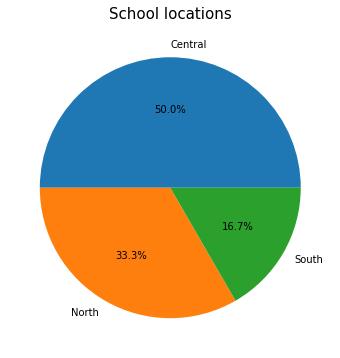

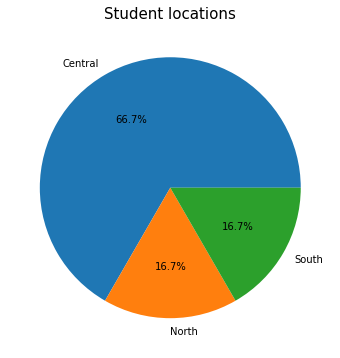

In [6]:
#EDA
plt.figure(figsize=(10,6))
plt.pie(schools_df.location.value_counts().values, labels=schools_df.location.value_counts().index,autopct='%1.1f%%')
plt.title("School locations", size = 15)
plt.show()
plt.figure(figsize=(10,6))
plt.pie(students_df.location.value_counts().values, labels=students_df.location.value_counts().index,autopct='%1.1f%%')
plt.title("Student locations", size = 15)
plt.show()

In [7]:
# Feature Engineering (Dummy variables for categorical features)
schools_df_encoded = pd.get_dummies(schools_df[['location', 'curriculum','sports_offered','extracurricular_activities']])
students_df_encoded = pd.get_dummies(students_df[['location', 'curriculum_preference','sports_preference','extracurricular_preference']])

In [8]:
schools_df_encoded.shape

(6, 12)

In [9]:
students_df_encoded.shape

(6, 12)

In [10]:
# Calculate cosine similarity between schools and students based on features
similarity_matrix = cosine_similarity(schools_df_encoded, students_df_encoded)

In [11]:
similarity_matrix

array([[1.        , 0.        , 0.28867513, 0.75      , 0.        ,
        0.5       ],
       [0.        , 0.57735027, 0.        , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.28867513, 0.8660254 , 0.25      , 0.5       ,
        0.5       ],
       [0.75      , 0.        , 0.        , 0.5       , 0.25      ,
        0.25      ],
       [0.        , 0.57735027, 0.        , 0.25      , 0.25      ,
        0.25      ],
       [0.5       , 0.28867513, 0.8660254 , 0.25      , 0.25      ,
        0.75      ]])

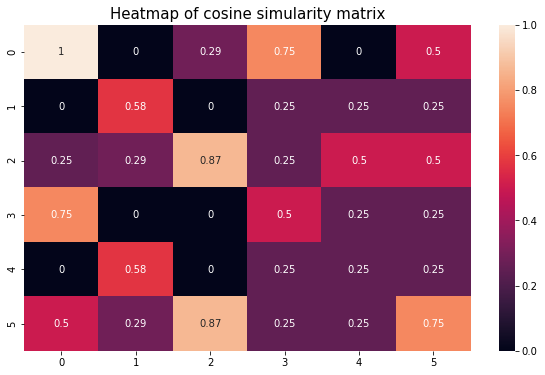

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(similarity_matrix,annot=True)
plt.title('Heatmap of cosine simularity matrix', size=15)
plt.show()

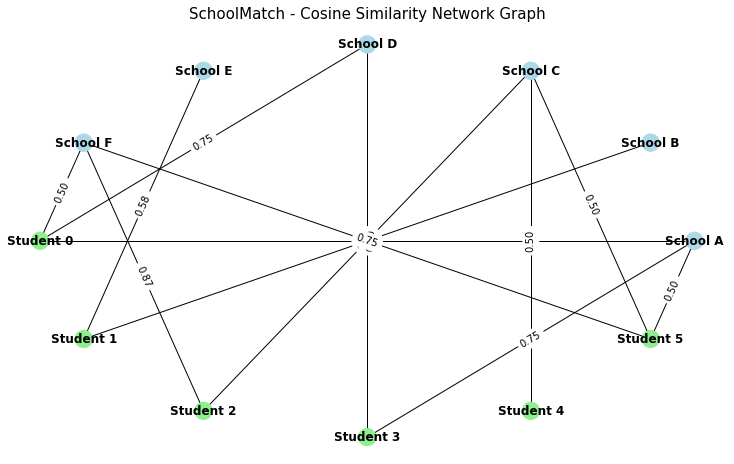

In [13]:

# Create NetworkX graph object
G = nx.Graph()

# Add nodes for schools and students with labels
G.add_nodes_from(schools_df['name'].tolist())
G.add_nodes_from([f"Student {i}" for i in range(len(students_df))], bipartite=True)
# Add edges with weight based on similarity score (threshold optional)
threshold = 0.5  # Optional threshold to filter weak connections
for i in range(len(schools_df)):
  for j in range(len(students_df)):
    if similarity_matrix[i][j] >= threshold:
      G.add_edge(schools_df.loc[i, 'name'], f"Student {j}", weight=similarity_matrix[i][j])

# Customize node colors (optional)
school_colors = ['lightblue' for _ in range(len(schools_df))]
student_colors = ['lightgreen' for _ in range(len(students_df))]
node_colors = school_colors + student_colors

# Layout options (choose based on preference)
# pos = nx.spring_layout(G)  # Spring layout
pos = nx.circular_layout(G)  # Circular layout

# Visualization using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold')

# Optional customizations (adjust based on preference)
edge_labels = {(u, v): f"{G.edges[u, v]['weight']:.2f}" for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("SchoolMatch - Cosine Similarity Network Graph", size='15')
plt.axis('off')
plt.show()

In [14]:
# Recommend top 3 schools for each student based on similarity scores
for i, student in students_df.iterrows():
  similar_schools = schools_df.iloc[similarity_matrix[i].argsort()[-3:]]
  print(f"Student (Grade {student['grade']}, {student['location']}) Recommended Schools:")
  for index, row in similar_schools.iterrows():
    print(f"\t- {row['name']}")

Student (Grade 8, Central) Recommended Schools:
	- School F
	- School D
	- School A
Student (Grade 10, North) Recommended Schools:
	- School E
	- School F
	- School B
Student (Grade 9, Central) Recommended Schools:
	- School E
	- School F
	- School C
Student (Grade 1, Central) Recommended Schools:
	- School F
	- School D
	- School A
Student (Grade 3, South) Recommended Schools:
	- School E
	- School F
	- School B
Student (Grade 12, Central) Recommended Schools:
	- School A
	- School F
	- School C
